# Scraping a static web page and analyse its data

## Scraping the web page

In [1]:
from bs4 import BeautifulSoup
import requests

In [25]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
headers = {"User-Agent": "Chrome"}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.text, 'html')

In [79]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feat

In [80]:
# <table class="wikitable sortable jquery-tablesorter">
# table = soup.find('table', class_= 'wikitable sortable')
table = soup.find_all('table')[1]
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [81]:
world_titles = table.find_all('th')

In [93]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [94]:
header_row = [title.text.strip() for title in world_titles]
print(header_row)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [103]:
import pandas as pd

In [120]:
df = pd.DataFrame(columns = header_row)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [121]:
column_data = table.find_all('tr')

In [122]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    row_indvidual = [data.text.strip() for data in row_data]
    df.loc[len(df)] = row_indvidual

In [123]:
df.to_csv(r"C:\Users\Hamza Eldafrawy\Desktop\Reusme\Elevvo training\Task 2\comp.csv", index = False)

## Analysis the data

In [124]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


<h4>formatting & converting</h4>

In [127]:
# remove comma and convert to numbers
df['Rank'] = df['Rank'].astype(int)

df['Revenue (USD millions)'] = (df['Revenue (USD millions)'].str.replace(',', '', regex=True).astype(float))

# convert to numbers
df['Employees'] = (df['Employees'].str.replace(',', '', regex=True).astype(float))

# remove % and convert
df['Revenue growth'] = (df['Revenue growth'].str.replace('%', '', regex=True).astype(float))

# ensure clean text
df['Name'] = df['Name'].str.strip()
df['Industry'] = df['Industry'].str.strip()
df['Headquarters'] = df['Headquarters'].str.strip()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int32  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    float64
 6   Headquarters            100 non-null    object 
dtypes: float64(3), int32(1), object(3)
memory usage: 5.9+ KB


<h4>basic EDA</h4>

In [129]:
print(df.shape)
print(df.isna().sum())
print(df['Industry'].nunique(), "unique industries")
print(df['Headquarters'].nunique(), "unique HQ locations")

(100, 7)
Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64
37 unique industries
71 unique HQ locations


<h4>Visualization and Insights</h4>

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

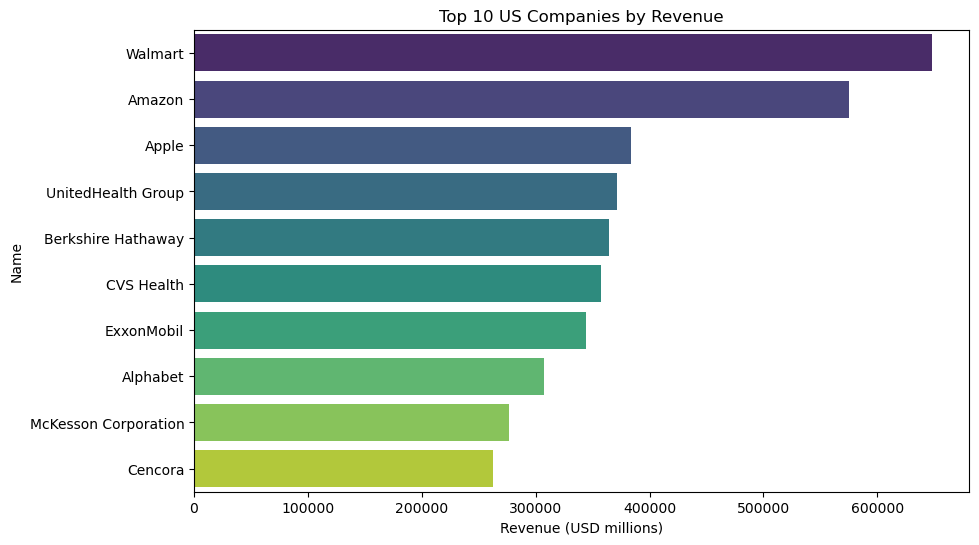

In [139]:
top10 = df.nlargest(10, 'Revenue (USD millions)')
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Revenue (USD millions)', y='Name', hue = 'Name', legend=False, palette='viridis')
plt.title("Top 10 US Companies by Revenue")
plt.show()


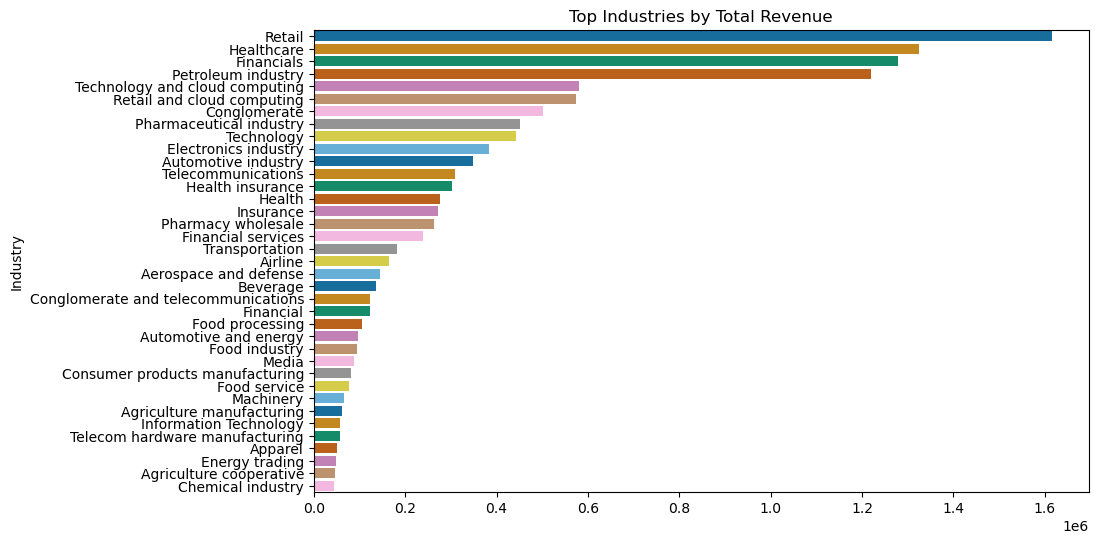

In [159]:
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum().sort_values(ascending=False)#.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=industry_revenue.values, y=industry_revenue.index, hue=industry_revenue.index, palette="colorblind")
plt.title("Top Industries by Total Revenue")
plt.show()

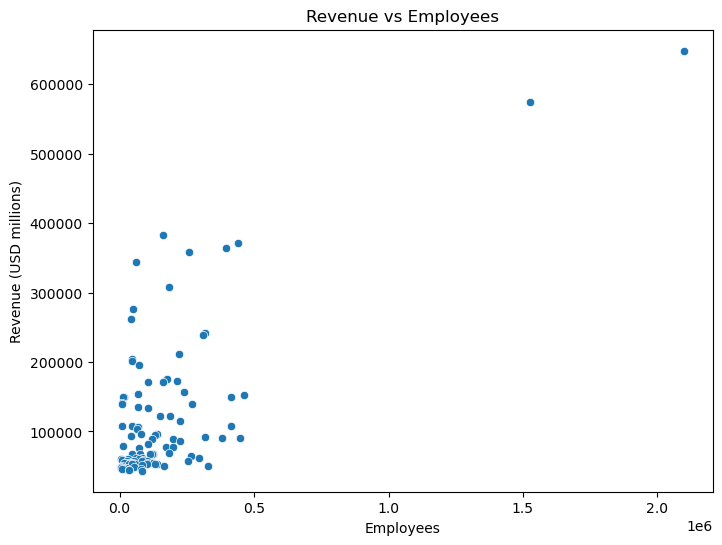

In [150]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Employees', y='Revenue (USD millions)')

plt.title("Revenue vs Employees")
plt.show()


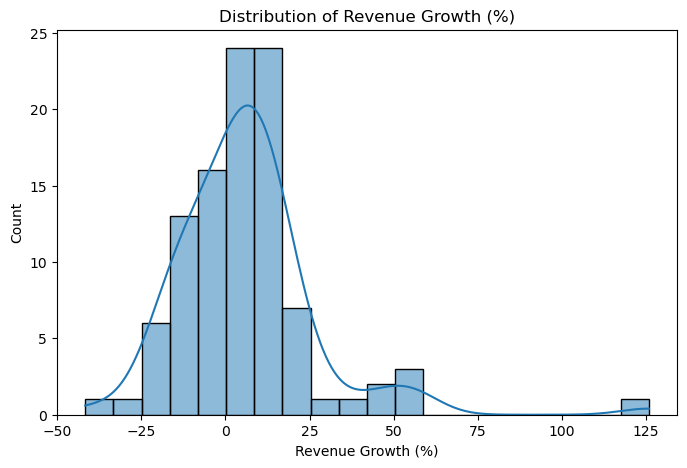

In [153]:
plt.figure(figsize=(8,5))
sns.histplot(df['Revenue growth'].dropna(), bins=20, kde=True)
plt.title("Distribution of Revenue Growth (%)")
plt.xlabel("Revenue Growth (%)")
plt.show()

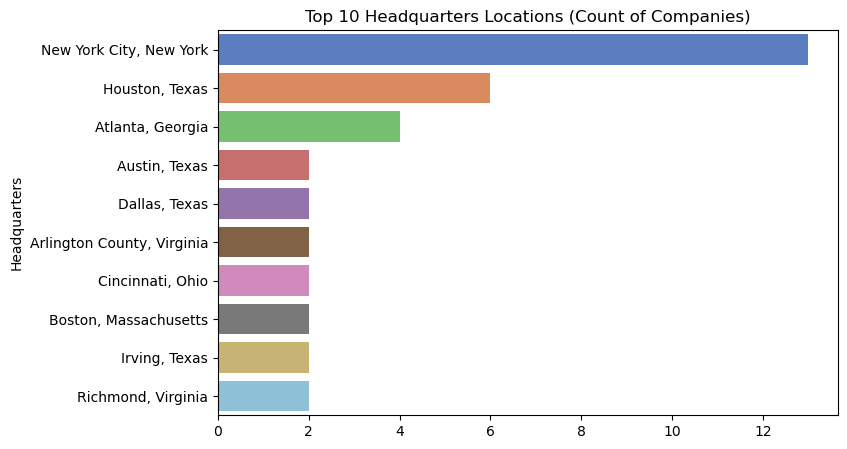

In [155]:
hq_counts = df['Headquarters'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=hq_counts.values, y=hq_counts.index,hue=hq_counts.index, palette="muted")
plt.title("Top 10 Headquarters Locations (Count of Companies)")
plt.show()

In [160]:
df.to_csv("us_companies_clean.csv", index=False)